<a href="https://colab.research.google.com/github/sofiarochinhauab/convolutional-network/blob/main/convolutionalnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [26]:
import os
import pandas as pd

import seaborn as sns
import cv2
import tensorflow as tf

#for the zip files
import zipfile

#for copy the images to a new path
import shutil

#for check if the image is ok or not
import imghdr

import numpy as np
import matplotlib.pyplot as plt

In [3]:
#avoid OOM erros by setting GPU memory consumption growth

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

### import the images


In [4]:
#import json config in the kaggle profile for api
#profile -> api -> token -> upload the json

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sofiarochinha","key":"7cbc7c43a6e3b368dd98a42839ee53f4"}'}

In [5]:
#create a new directory for the json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#import all the images
!kaggle datasets download -d faizalkarim/cleandirty-road-classification

 96% 69.0M/71.6M [00:03<00:00, 27.3MB/s]
100% 71.6M/71.6M [00:03<00:00, 22.4MB/s]


In [8]:
#unzip all the files
zip_ref = zipfile.ZipFile('cleandirty-road-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

### Prepare the data


In [27]:
#get all the images
path_images = '/content/files/Images/Images/'
img_names = os.listdir(path_images)

#the new paths for the selected data
!mkdir -p '/content/images/clean'
!mkdir -p '/content/images/dirty'

path_clean_image = '/content/images/clean/'
path_dirty_image = '/content/images/dirty/'


Separe the images int two classes: clean and dirty.

In [28]:

for img_name in img_names:
    # Caminho completo para a imagem
    img_path = os.path.join(path_images, img_name)

    # Carregar a imagem
    img = cv2.imread(img_path)

    # Adicionar o rótulo correspondente à lista de rótulos
    if 'clean' in img_name:
       shutil.copy(img_path, path_clean_image)
    elif "dirty" in img_name:
       shutil.copy(img_path, path_dirty_image)

See if the data is not corrupted


In [ ]:
#files formats that are allowed by tensor
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

#path with selected images
path = '/content/images/'


# check if the image is ok
# if not remove it
# not every image that have a extension 'jpeg' for example, is a jpeg file

for image_class in os.listdir(path):
  for image in os.listdir(os.path.join(path, image_class)):
    image_path = os.path.join(path, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)

      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)

    except Exception as e:
      print('Issue with image {}'.format(image_path))
      os.remove(image_path)


### load the data

In [32]:
# Found 207 files belonging to 2 classes
data = tf.keras.utils.image_dataset_from_directory(path)

#if we not check all the images will be an error
# prepare the images for same size, color, etc
# size = 256x256 by default
# batch_size = 32 by default
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 207 files belonging to 2 classes.


In [33]:
# we can see that all the images have a classification that we don't know yet but there is 0 and 1 classes
batch[1]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int32)

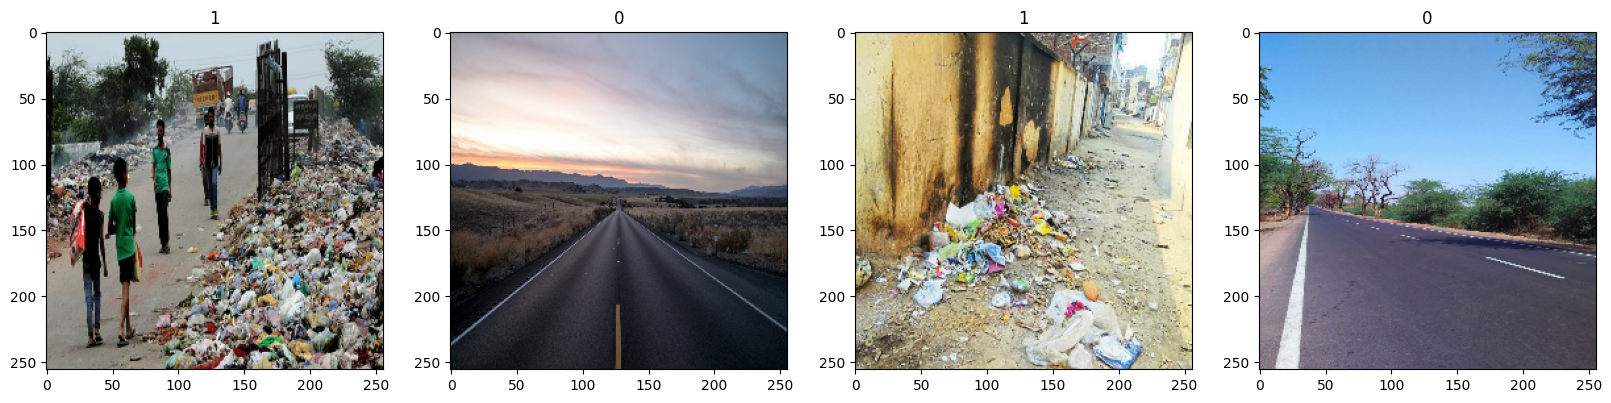

In [34]:
#this is one way too see wich classes belong 0 and 1
# 1 is dirty
# 0 is clean
# we can see that the images have the same size
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


# Preprocess Data